In [3]:
import pandas as pd
import os
import math
from scipy.stats import norm 

In [4]:
os.getcwd()

'/Users/ciellagrange/Documents'

Invariate: Num of cookies for page view, Num of clicks, CTP
Evaluation: gross conversion, retention, net conversion

In [5]:
control = pd.read_excel('../Downloads/Final Project Results.xlsx', sheet_name='Control')

In [6]:
experiment = pd.read_excel('../Downloads/Final Project Results.xlsx', sheet_name='Experiment')

In [7]:
baseline = pd.read_excel('../Downloads/Final Project Baseline Values.xlsx', sheet_name=0, header=None)

In [14]:
#Baseline Values
baseline

,0,1
0,Unique cookies to view course overview page pe...,40000.000000
1,"Unique cookies to click ""Start free trial"" per...",3200.000000
2,Enrollments per day:,660.000000
3,"Click-through-probability on ""Start free trial"":",0.080000
4,"Probability of enrolling, given click:",0.206250
5,"Probability of payment, given enroll:",0.530000
6,"Probability of payment, given click",0.109313


In [8]:
#Baseline sd for evaluation metrics in 5000 cookies sample space
sd = dict()
sd['gross_conversion'] = math.sqrt(baseline.loc[4,1]*(1-baseline.loc[4,1])/400)
sd['retension'] = math.sqrt(baseline.loc[5,1]*(1-baseline.loc[5,1])/82.5)
sd['net_conversion'] = math.sqrt(baseline.loc[6,1]*(1-baseline.loc[6,1])/400)
sd

{'gross_conversion': 0.020230604137049392,
 'retension': 0.05494901217850908,
 'net_conversion': 0.01560154458248846}

In [80]:
#from scipy.optimize import minimize
def sample_size_calculator(sd, min_effect, alpha = 0.05, beta = 0.2):
    z_star = (lambda x:-norm.ppf(x/2))(alpha)
    def beta_optimize(N):
        SE = sd/math.sqrt(N)
        return (beta - norm.cdf(z_star*SE,loc = min_effect,scale = SE))
    for x0 in range(1,500000):
        if beta_optimize(x0) >= 0:
            return x0
    return (-1)

print ("Sample size for gross conversion: ", sample_size_calculator(sd['gross_conversion']*math.sqrt(400),0.01), "cookies with click")
print ("Sample size for retension: ", sample_size_calculator(sd['retension']*math.sqrt(82.5),0.01), "cookies with enroll")
print ("Sample size for net conversion: ", sample_size_calculator(sd['net_conversion']*math.sqrt(400),0.0075), "cookies with click")



Sample size for gross conversion:  12850 cookies with click
Sample size for retension:  19552 cookies with enroll
Sample size for net conversion:  13586 cookies with click


In [81]:
print("pageview for gross conversion: ", 12850/0.08)
print("pageview for retension: ", 19552/0.20625/0.08)
print("pageview for gross conversion: ", 13586/0.08)


pageview for gross conversion:  160625.0
pageview for retension:  1184969.696969697
pageview for gross conversion:  169825.0


In [9]:
control['click_through_prob'] = control.Clicks/control.Pageviews
experiment['click_through_prob'] = experiment.Clicks/experiment.Pageviews

In [10]:
control['gross_conversion'] = control.Enrollments/control.Clicks
experiment['gross_conversion'] = experiment.Enrollments/experiment.Clicks

In [11]:
control['retension'] = control.Payments/control.Enrollments
experiment['retension'] = experiment.Payments/experiment.Enrollments

In [75]:
control['net_conversion'] = control.Payments/control.Clicks
experiment['net_conversion'] = experiment.Payments/experiment.Clicks

In [76]:
experiment

,Date,Pageviews,Clicks,Enrollments,Payments,click_through_prob,gross_conversion,retension,net_conversion
0,1900-10-11,7716,686,105.0,34.0,0.088906,0.153061,0.323810,0.049563
1,1900-10-12,9288,785,116.0,91.0,0.084518,0.147771,0.784483,0.115924
2,1900-10-13,10480,884,145.0,79.0,0.084351,0.164027,0.544828,0.089367
3,1900-10-14,9867,827,138.0,92.0,0.083815,0.166868,0.666667,0.111245
4,1900-10-15,9793,832,140.0,94.0,0.084959,0.168269,0.671429,0.112981
5,1900-10-16,9500,788,129.0,61.0,0.082947,0.163706,0.472868,0.077411
6,1900-10-17,9088,780,127.0,44.0,0.085827,0.162821,0.346457,0.056410
7,1900-10-18,7664,652,94.0,62.0,0.085073,0.144172,0.659574,0.095092
8,1900-10-19,8434,697,120.0,77.0,0.082642,0.172166,0.641667,0.110473
9,1900-10-20,10496,860,153.0,98.0,0.081936,0.177907,0.640523,0.113953


In [13]:
sd

{'gross_conversion': 0.020230604137049392,
 'retension': 0.05494901217850908,
 'net_conversion': 0.01560154458248846}

In [77]:
control

,Date,Pageviews,Clicks,Enrollments,Payments,click_through_prob,gross_conversion,retension,net_conversion
0,1900-10-11,7723,687,134.0,70.0,0.088955,0.195051,0.522388,0.101892
1,1900-10-12,9102,779,147.0,70.0,0.085586,0.188703,0.476190,0.089859
2,1900-10-13,10511,909,167.0,95.0,0.086481,0.183718,0.568862,0.104510
3,1900-10-14,9871,836,156.0,105.0,0.084693,0.186603,0.673077,0.125598
4,1900-10-15,10014,837,163.0,64.0,0.083583,0.194743,0.392638,0.076464
5,1900-10-16,9670,823,138.0,82.0,0.085109,0.167679,0.594203,0.099635
6,1900-10-17,9008,748,146.0,76.0,0.083037,0.195187,0.520548,0.101604
7,1900-10-18,7434,632,110.0,70.0,0.085015,0.174051,0.636364,0.110759
8,1900-10-19,8459,691,131.0,60.0,0.081688,0.189580,0.458015,0.086831
9,1900-10-20,10667,861,165.0,97.0,0.080716,0.191638,0.587879,0.112660


In [22]:
control['Date'] = pd.to_datetime(control['Date'],format='%a, %b %d')

In [39]:
experiment['Date'] = pd.to_datetime(experiment['Date'],format='%a, %b %d')

In [24]:
control['Date']

0    1900-10-11
1    1900-10-12
2    1900-10-13
3    1900-10-14
4    1900-10-15
5    1900-10-16
6    1900-10-17
7    1900-10-18
8    1900-10-19
9    1900-10-20
10   1900-10-21
11   1900-10-22
12   1900-10-23
13   1900-10-24
14   1900-10-25
15   1900-10-26
16   1900-10-27
17   1900-10-28
18   1900-10-29
19   1900-10-30
20   1900-10-31
21   1900-11-01
22   1900-11-02
23   1900-11-03
24   1900-11-04
25   1900-11-05
26   1900-11-06
27   1900-11-07
28   1900-11-08
29   1900-11-09
30   1900-11-10
31   1900-11-11
32   1900-11-12
33   1900-11-13
34   1900-11-14
35   1900-11-15
36   1900-11-16
Name: Date, dtype: datetime64[ns]

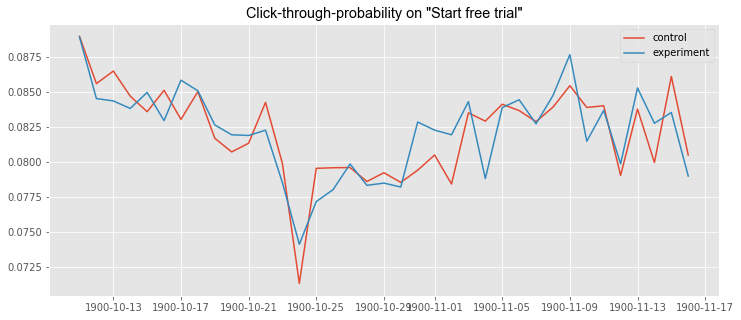

In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 5)
csfont = {'fontname':'Arial'}
plt.title('Click-through-probability on "Start free trial"', **csfont)
line1, = plt.plot(control['Date'],control['click_through_prob'], label='control')
line2, = plt.plot(control['Date'],experiment['click_through_prob'], label='experiment')
plt.legend(handles=[line1, line2])

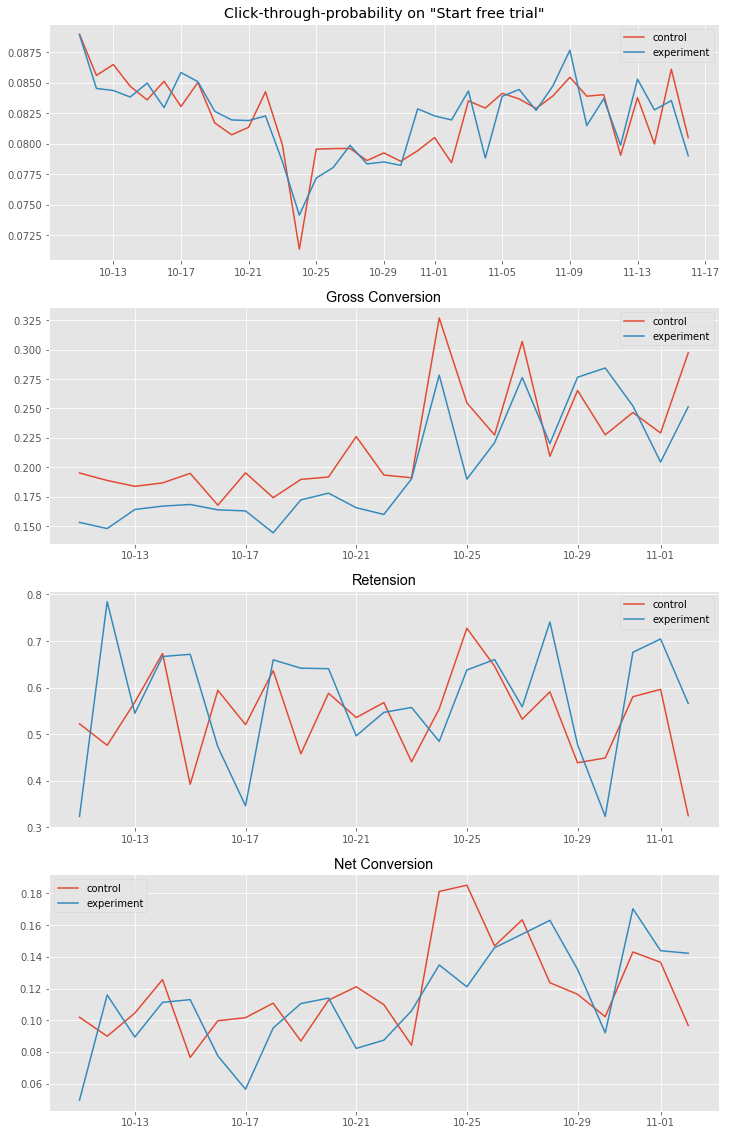

In [81]:
plt.rcParams['figure.figsize'] = (12, 20)
fig, ax = plt.subplots(4,1)

line1, = ax[0].plot(control['Date'],control['click_through_prob'], label='control')
line2, = ax[0].plot(control['Date'],experiment['click_through_prob'], label='experiment')
ax[0].set_title('Click-through-probability on "Start free trial"')
ax[0].legend(handles = [line1, line2])

line3, = ax[1].plot('Date', 'gross_conversion', data = control[:23], label = 'control')
line4, = ax[1].plot('Date','gross_conversion', data = experiment[:23], label = 'experiment')
ax[1].set_title('Gross Conversion', **csfont)
ax[1].legend(handles=[line3, line4])

line5, = ax[2].plot('Date', 'retension', data = control[:23], label = 'control')
line6, = ax[2].plot('Date','retension', data = experiment[:23], label = 'experiment')
ax[2].set_title('Retension', **csfont)
ax[2].legend(handles=[line5, line6])

line7, = ax[3].plot('Date', 'net_conversion', data = control[:23], label = 'control')
line8, = ax[3].plot('Date','net_conversion', data = experiment[:23], label = 'experiment')
ax[3].set_title('Net Conversion', **csfont)
ax[3].legend(handles=[line7, line8])



#days = mdates.AutoDateLocator()
#ax.xaxis.set_major_locator(days)
days_fmt = mdates.DateFormatter('%m-%d')
for i in range(4):
    ax[i].xaxis.set_major_formatter(days_fmt)

#ax.format_xdata = mdates.DateFormatter('%m-%d')

plt.show()

#line3, = plt.plot(control['gross_conversion'], label='control')
#line4, = plt.plot(experiment['gross_conversion'], label='experiment')
#plt.legend(handles=[line3, line4])

In [48]:
print ("Control group:")
print ("Clicks = ", control['Clicks'].sum(), "   ", 
      "Pageviews = ", control['Pageviews'].sum())
print ()
print ("Experimental group:")
print ("Clicks = ", experiment['Clicks'].sum(), "   ", 
      "Pageviews = ", experiment['Pageviews'].sum())


Control group:
Clicks =  28378     Pageviews =  345543

Experimental group:
Clicks =  28325     Pageviews =  344660


In [52]:
#for Clicks & Pageviews
p = 0.5
sd['Clicks'] = math.sqrt(p*p/(control['Clicks'].sum()+experiment['Clicks'].sum()))
print(sd['Clicks'])
sd['Pagesviews'] = math.sqrt(p*p/(control['Pageviews'].sum()+experiment['Pageviews'].sum()))
print(sd['Pagesviews'])

0.002099747079699252
0.0006018407402943247


In [63]:
# for CTP
p_ctp = (control['Clicks'].sum() + experiment['Clicks'].sum())/(control['Pageviews'].sum() + experiment['Pageviews'].sum())
sd['click_through_prob'] = math.sqrt(p_ctp*(1-p_ctp)*(1/control['Pageviews'].sum() + 1/experiment['Pageviews'].sum()))
print(sd['click_through_prob'])

0.0006610608156387222


In [70]:
def CI(p, sd, alpha):
    return ([p + norm.ppf(alpha/2)*sd, p - norm.ppf(alpha/2)*sd])

In [72]:
print(experiment['Clicks'].sum()/(experiment['Clicks'].sum()+control['Clicks'].sum()))
print(CI(p, sd['Clicks'], 0.05))

0.49953265259333723
[0.4958845713471463, 0.5041154286528536]


In [74]:
print(experiment['Pageviews'].sum()/(experiment['Pageviews'].sum()+control['Pageviews'].sum()))
print(CI(p, sd['Pagesviews'], 0.05))

0.4993603331193866
[0.4988204138245942, 0.5011795861754058]


In [65]:
print(experiment['Clicks'].sum()/experiment['Pageviews'].sum()-control['Clicks'].sum()/control['Pageviews'].sum())
print(CI(0, sd['click_through_prob'], 0.05))

5.662709158693602e-05
[-0.0012956553902425685, 0.0012956553902425685]


In [97]:
#Gross Conversion
p_bar = dict()
sd_bar = dict()
p_bar['gross_conversion'] = (control['Enrollments'].sum() + experiment['Enrollments'].sum())/(control.loc[:22,'Clicks'].sum() + experiment.loc[:22,'Clicks'].sum())
sd_bar['gross_conversion'] = math.sqrt(p_bar['gross_conversion']*(1-p_bar['gross_conversion'])*(1/control.loc[:22,'Clicks'].sum() + 1/experiment.loc[:22,'Clicks'].sum()))
print(p_bar['gross_conversion'], sd_bar['gross_conversion'])
print(CI(0, sd_bar['gross_conversion'] , 0.05))
print(experiment['Enrollments'].sum()/experiment.loc[:22, 'Clicks'].sum() - control['Enrollments'].sum()/control.loc[:22, 'Clicks'].sum())


[-0.008568326307143104, 0.008568326307143104]
-0.020554874580361565


In [98]:
#Net Conversion
p_bar['net_conversion'] = (control['Payments'].sum() + experiment['Payments'].sum())/(control.loc[:22,'Clicks'].sum() + experiment.loc[:22,'Clicks'].sum())
sd_bar['net_conversion'] = math.sqrt(p_bar['net_conversion']*(1-p_bar['net_conversion'])*(1/control.loc[:22,'Clicks'].sum() + 1/experiment.loc[:22,'Clicks'].sum()))
print(p_bar['net_conversion'], sd_bar['net_conversion'])
print(CI(0, sd_bar['net_conversion'] , 0.05))
print(experiment['Payments'].sum()/experiment.loc[:22, 'Clicks'].sum() - control['Payments'].sum()/control.loc[:22, 'Clicks'].sum())


0.1151274853124186 0.0034341335129324238
[-0.006730778003449568, 0.006730778003449568]
-0.0048737226745441675


In [116]:
#Sign Test

#gross conversion
print('Gross Conversion: Success', sum(experiment[:23].Enrollments/experiment[:23].Clicks > control[:23].Enrollments/control[:23].Clicks),
      ', Total 23')

print('Net Conversion: Success', sum(experiment[:23].Payments/experiment[:23].Clicks > control[:23].Payments/control[:23].Clicks),
      ', Total 23')

Gross Conversion: Success 4 , Total 23
Net Conversion: Success 10 , Total 23


In [114]:
from scipy.special import comb
def sign_test_onetail(p, suc_num, total):
    prob = 0
    while suc_num > 0:
        prob += comb(total, suc_num)*p**suc_num*(1-p)**(total - suc_num)
        suc_num -= 1
    return prob

In [118]:
print(sign_test_onetail(0.5, 4, 23))
print(sign_test_onetail(0.5, 10, 23))

0.0012996196746826172
0.33881962299346924
